In [48]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'astrafy-thc' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [49]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_30816329_184148cbf49') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `astrafy-thc.dbt_nawfelbc.count_transactions`


In [50]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_30816329_184148cbf49') # Job ID inserted based on the query results selected to explore
df = job.to_dataframe()
df

,date,number_of_transactions
0,2022-07-26,33182
1,2022-07-27,31662
2,2022-07-28,34727
3,2022-07-29,34637
4,2022-07-30,31186
...,...,...
86,2022-10-20,18168
87,2022-10-21,19182
88,2022-10-22,17370
89,2022-10-23,17615


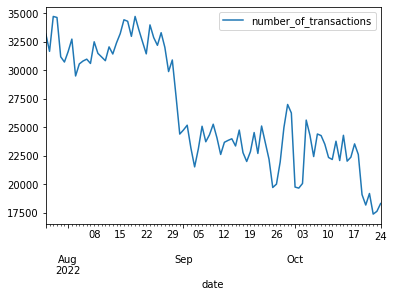

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'],inplace=True)
df.plot()